# Michelson interferometer frequency response to gravitational wave perturbation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from ifo_configs import mich_freq_resp as MICH
from ifo_configs import N_shot
%matplotlib inline
plt_style_dir = 'stash/'
if os.path.isdir(plt_style_dir) == True:
    plt.style.use(plt_style_dir + 'ppt2latexsubfig.mplstyle')
plt.rcParams["font.family"] = "Times New Roman"

In [2]:
# Some parameters
cee = np.float64(299792458)
h_bar = (6.626e-34)/(2*np.pi)
OMEG = np.float64(2*np.pi*cee/(1064.0*10-9))
L = np.float64(4000.0)
nu = np.arange(1, 1000000, 1)
PHI_0 = np.pi/2 #[rad]
P_IN = 125 #[W]

## Derivation*

For the simple Michelson we know that a change in arm length correlates to light at the AS port
We also know that a differential arm length corresponds to a difference in phase of the light that impinges upon the BS
For a gravitational wave we can quantify the phase difference in this following way: 

$$
\phi_A - \phi_B = \int_{t-2L/c}^{t} \Omega \bigg[1 + \frac{1}{2}h(t)\bigg]dt - \int_{t-2L/c}^{t} \Omega \bigg[1 - \frac{1}{2}h(t)\bigg]dt \label{eq1}\tag{1}
$$
The phase difference can then be quantified by:
$$
\phi_A - \phi_B = \int_{t-2L/c}^{t} \Omega h(t)dt \label{eq2}\tag{2}
$$
where 
$$ 
h(t) = h_0 e^{i \omega t} \label{eq3}\tag{3}
$$

*$\Omega$* is the **optical angular frequency**

After evaluating this integral we get: 
$$
\Delta \phi=\phi_A - \phi_B = \frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c} \cdot h_0 e^{i \omega t}
$$

Where the first term in the phase difference carries all the time independent frequency information. This is what we are calculating below. 

For the sake of being explicit, we are going to plot: 
$$
\Delta \phi (\omega) = h_0\frac{2 L \Omega}{c}e^{-i L \omega / c} \frac{\mathrm{sin}(L \omega /c)}{L \omega /c}
$$


This accounts for the differential phase as a function of gravitational wave frequency, though we have not established the amount of optical gain the Michelson offers. This can be understood through a first order taylor approximation about a selected Michelson offset angle $\phi_0$:

$$P(\omega, \phi_0) =  \frac{P_\mathrm{in}}{4} [r_x^2 + r_y^2 -  2r_x r_y\mathrm{cos}(\phi_0 + \Delta \phi (\omega)] $$

$$P(\omega, \phi_0) \approx  \frac{P_\mathrm{in}}{4} \Big[ r_x^2 + r_y^2 -  2r_x r_y \big(\mathrm{cos}(\phi_0) - \Delta \phi(\omega) \cdot \mathrm{sin}(\phi_0) \big) \Big] =  \frac{P_\mathrm{in}}{2} \Big[1 - \big(\mathrm{cos}(\phi_0) - \Delta \phi(\omega) \cdot \mathrm{sin}(\phi_0) \big) \Big]$$

Where we define a response gain function $H_\mathrm{MICH}$:

$$\mathrm{H}_\mathrm{MICH}(\omega, \phi_0) =   \frac{P_\mathrm{in}}{2} \cdot \Delta \phi(\omega) \cdot \mathrm{sin}(\phi_0)$$


In [3]:
MICH?

Signature: MICH(freq, Length, phi_0, P_in)
Docstring:
freq : standard frequency [Hz]
Length : Michelson ifo arm length [m]
phi_0 : microscopic differential arm tuning [rad]
P_in : input power [W]
File:      ~/Documents/git/dissertation/code/ifo_configs.py
Type:      function


In [4]:
H = MICH(nu, L, PHI_0, P_IN)

Text(0, 0.5, 'phase [deg]')

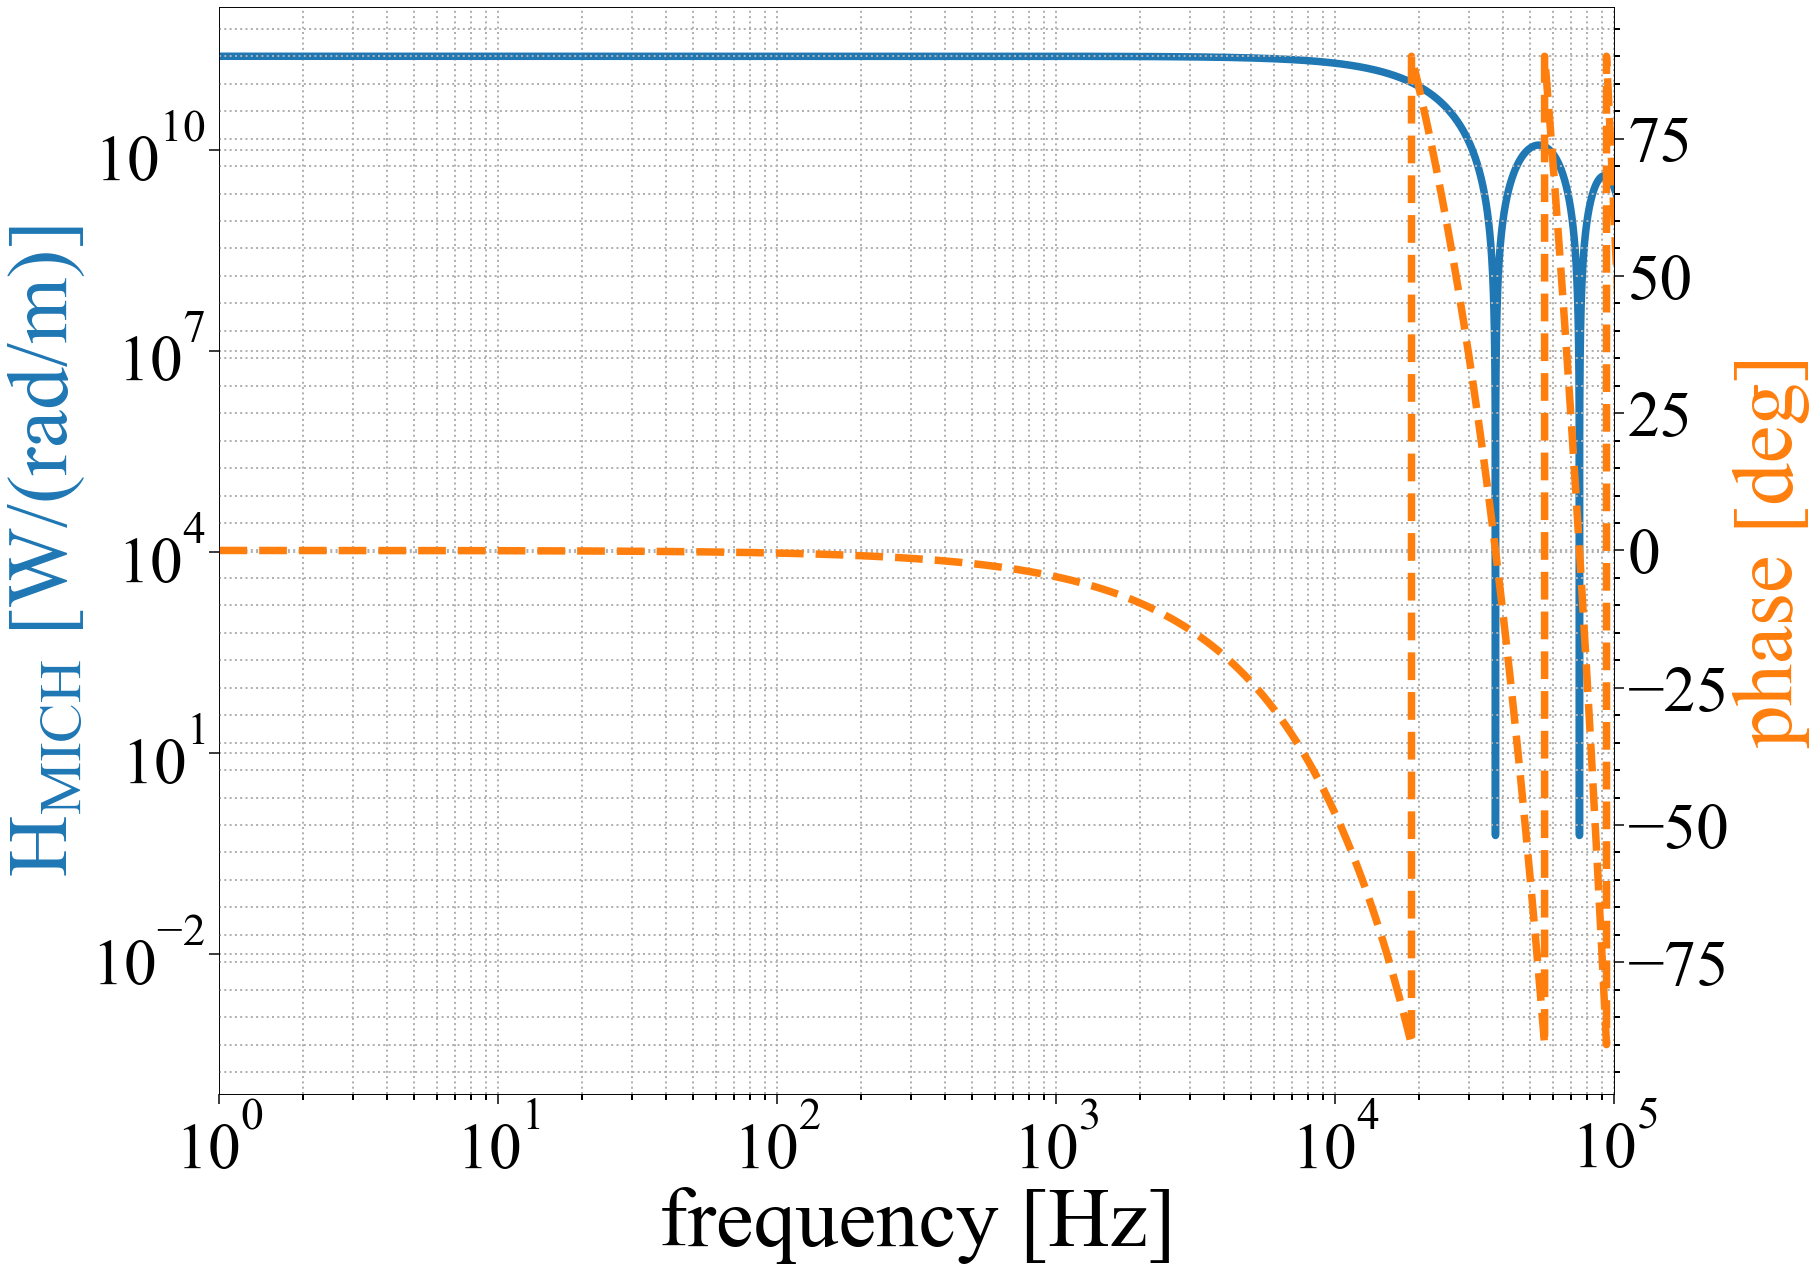

In [5]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('frequency [Hz]')
ax1.set_ylabel('H$_{\mathdefault{MICH}}$ [W/(rad/m)]',color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1.loglog(np.real(H)**2 + np.imag(H)**2,linewidth=7.5, color='C0')
#plt.ylim([10e-6, 10e0])
ax2 = ax1.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
ax2.semilogx(nu,(180/np.pi)*np.arctan(np.imag(H)/np.real(H)), '--', linewidth=7.5,color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([1,1e5])
plt.ylabel('phase [deg]',color='C1')

In [6]:
fig.savefig('../figs/INTRO/mich_fr.pdf', dpi=300, bbox_inches='tight')

### *The derivation noted was heavily influenced by Koji's explanation in DCC G1401144

Though with the provided frequency depdenence and optical gain, we still need to understand a starting noise floor for our measurement 
* The noise floor is established

## Shot noise
* A fundamental limit imposed by the statistical nature of photon counting
* The photon counting follows Poisson statistics
    * Photon counting variance (variance is equal to the mean)
$$ < (n-\bar{n})^2 >  = \frac{P \Delta t}{ \hbar \Omega} $$
    * Power variance:
$$ < (P - \bar{P})^2 >  = \hbar \Omega  \bar{P} \Delta t $$
    * PSD of the measured power between two uncoorelated moments in time:
$$ S_\mathrm{P} (\omega) = \lim_{T \to \infty} \frac{2}{T} \Big< \big| \int_{-T}^{T} (P(t) - \bar{P}) e^{-i\omega t} dt \big|^2 \Big> $$
$$ =  \lim_{T \to \infty} \frac{2}{T} \int_{-T}^{T} \hbar \Omega \bar{P} dt  $$
$$ = 2 \hbar \Omega \bar{P} $$
    * Where the ASD is:
$$ [S_P (\omega)]^{1/2} = [2 \hbar \Omega \bar{P}]^{1/2}$$



The signal to noise is established by dividing the frequency dependent optical gain times the gravitational wave ASD $\big( [\mathrm{S}_{\mathrm{h}}(\Omega)]^{1/2} \big)$ by the noise ASD:

$$\mathrm{SNR} = \mathrm{G_{opt}(\omega)} [\mathrm{S}_{\mathrm{h}}(\omega)]^{1/2} / S_\mathrm{N}(\omega) = \mathrm{H}_\mathrm{MICH} / [S_P]^{1/2} = \bigg( \frac{\Delta \phi(\omega)}{h_0} \frac{P_\mathrm{in}}{2}\mathrm{sin}(\phi_0) \bigg) \bigg/ [2 \hbar \Omega \bar{P}]^{1/2}$$

This is to say that for the stated gravitational wave ASD, and for an SNR of 1, we establish the following threshold for detector:

$$\big[ \mathrm{S}_{\mathrm{h}}(\omega) \big]^{1/2} \; \{\mathrm{SNR}\geq1\} \geq \frac{ [S_\mathrm{N}(\omega)]^{1/2}}{\mathrm{H}_\mathrm{MICH}(\omega)}$$

Where 

$$\frac{ [S_\mathrm{N}(\omega)]^{1/2}}{\mathrm{H}_\mathrm{MICH}(\omega)} = \frac{[2 \hbar \omega \bar{P}]^{1/2}}{ \Delta \phi(\omega) [P_\mathrm{in} / 2]  \mathrm{sin}(\phi_0)} = \bigg( \frac{\hbar \Omega }{\omega P_\mathrm{in}} \bigg)^{1/2} \frac{[r_x^2 + r_y^2 -  2r_x r_y\mathrm{cos}(\phi_0)]^{1/2}}{\mathrm{sin}(L \omega / c)} e^{iL \omega / c}$$

In [7]:
N_shot?

Signature: N_shot(OMEG, Length, phi_0, P_in)
Docstring:
Interferometer shot noise calculator
Inputs:
OMEG: OPTICAL angular frequency [rad Hz]
Length : ifo arm length [m]
phi_0 : microscopic differential arm tuning [rad]
P_in : Input power [W]
File:      ~/Documents/git/dissertation/code/ifo_configs.py
Type:      function


In [8]:
S_h = N_shot(OMEG, L, PHI_0, P_IN)/H 
print(S_h)

[ 3.45811152e-20+2.89906633e-24j  3.45811149e-20+5.79813266e-24j
  3.45811145e-20+8.69719899e-24j ... -1.90494506e-18+2.89905763e-18j
 -1.90529496e-18+2.89906053e-18j -1.90564489e-18+2.89906343e-18j]


Text(0, 0.5, 'phase [deg]')

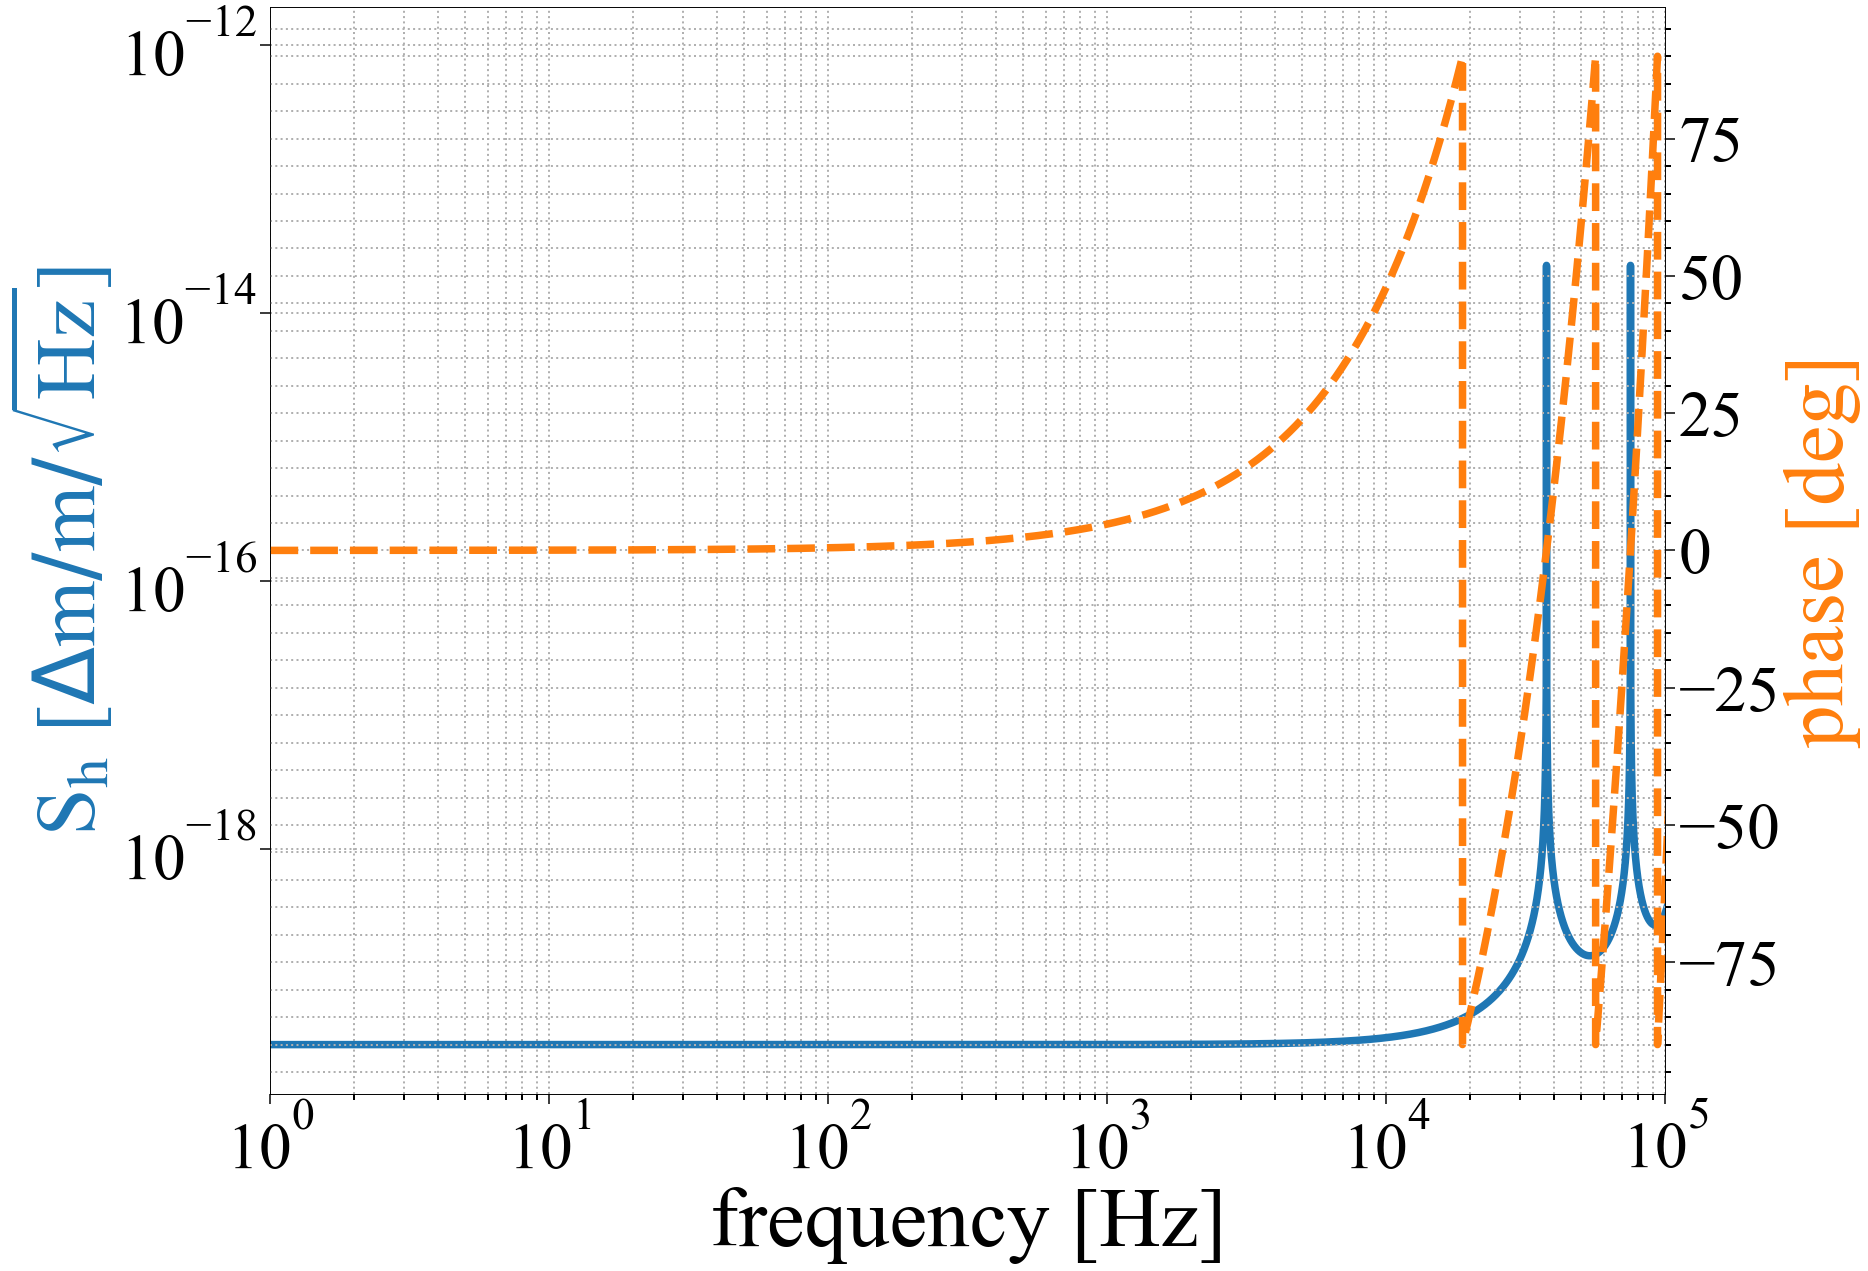

In [9]:
fig1, ax1_ = plt.subplots()
ax1_.set_xlabel('frequency [Hz]')
ax1_.set_ylabel('$\mathdefault{S}_\mathdefault{h} \;  \mathdefault{[} \Delta \mathdefault{m} / \mathdefault{m} / \sqrt{\mathdefault{Hz}} \mathdefault{]} $',color='C0')
#ax1.plot(w/(FSR), F_w_cc_modsq*100)
ax1_.loglog(nu,np.sqrt(np.real(S_h)**2 + np.imag(S_h)**2),linewidth=7.5, color='C0')
#plt.ylim([10e-6, 10e0])
ax2_ = ax1_.twinx()
#ax2.plot(w/(FSR), (180/np.pi)*np.arctan(F_w_cc.imag/F_w_cc.real), '--')
ax2_.semilogx(nu,(180/np.pi)*np.arctan(np.imag(S_h)/np.real(S_h)), '--', linewidth=7.5,color='C1')
#plt.xlabel('frequency [FSR]')
plt.xlim([1,1e5])
plt.ylabel('phase [deg]',color='C1')